# DATA CLEANING  AND VISUALIZATION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt


In [2]:
airbnb=pd.read_csv("Airbnb Dataset 19.csv")

In [3]:
airbnb.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,10/19/2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,5/21/2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,7/5/2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,11/19/2018,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,6/22/2019,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,10/5/2017,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,6/24/2019,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,7/21/2017,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,6/9/2019,1.33,4,188


In [6]:
airbnb.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [7]:
airbnb.shape   # We have 249 rows and 16 columns

(249, 16)

In [8]:
airbnb.describe()     # We can see most of the columns having 249 enries

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,249.000000,2.490000e+02,249.000000,249.000000,249.000000,249.000000,249.000000,242.000000,249.000000,249.000000
mean,31376.771084,1.499884e+05,40.730257,-73.964044,143.971888,8.718876,103.445783,1.091653,1.738956,198.538153
std,18101.018309,4.010393e+05,0.049660,0.029685,91.442975,20.398680,100.337887,1.000168,1.234635,126.048056
min,2539.000000,2.787000e+03,40.631880,-74.080880,35.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,15711.000000,5.014800e+04,40.688430,-73.984980,85.000000,2.000000,21.000000,0.280000,1.000000,75.000000
50%,28321.000000,9.779700e+04,40.721620,-73.964280,125.000000,3.000000,73.000000,0.795000,1.000000,225.000000
75%,46911.000000,1.936370e+05,40.761930,-73.948220,175.000000,5.000000,166.000000,1.650000,2.000000,310.000000
max,62430.000000,6.197784e+06,40.867540,-73.765970,800.000000,200.000000,467.000000,4.720000,6.000000,365.000000


In [9]:
# Check categerical columns details.
Category=airbnb.dtypes[airbnb.dtypes=="object"].index
Category

Index(['name', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'room_type', 'last_review'],
      dtype='object')

In [10]:
airbnb[Category].describe()       

,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review
count,249,249,249,249,249,242
unique,249,204,5,55,3,129
top,Clean & quiet apt home by the park,Mark,Manhattan,Williamsburg,Entire home/apt,6/22/2019
freq,1,6,124,26,134,13


In [11]:
# Check last review columns with correct datetime format


airbnb["last_review"]

0      10/19/2018
1       5/21/2019
2             NaN
3        7/5/2019
4      11/19/2018
          ...    
244     6/23/2019
245     4/30/2019
246     6/14/2019
247     5/26/2019
248     6/22/2019
Name: last_review, Length: 249, dtype: object

In [12]:
# Converting last_review column to correct date time format.

airbnb['last_review']=pd.to_datetime(airbnb['last_review'])
airbnb['last_review']

0     2018-10-19
1     2019-05-21
2            NaT
3     2019-07-05
4     2018-11-19
         ...    
244   2019-06-23
245   2019-04-30
246   2019-06-14
247   2019-05-26
248   2019-06-22
Name: last_review, Length: 249, dtype: datetime64[ns]

In [13]:
# Check any enries are there beyond todays date:
today=dt.date.today()
today

datetime.date(2023, 5, 4)

In [14]:
# last_review column is clean
airbnb[airbnb['last_review'].dt.date > today]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365


In [15]:
# Check room_type values having repeated entries: This column is clean
airbnb["room_type"].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [16]:
# Check price column:

airbnb["price"]

0      149
1      225
2      150
3       89
4       80
      ... 
244    120
245    110
246     65
247    130
248     99
Name: price, Length: 249, dtype: int64

<AxesSubplot:xlabel='price', ylabel='Density'>

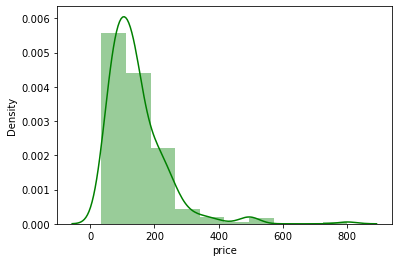

In [47]:
# Distribution Plot  
# To Check the overall distibution  of  data parameters.
# Plot a distribution plot  to check how price is distributed:

sns.distplot(airbnb["price"],bins=10,color="green")

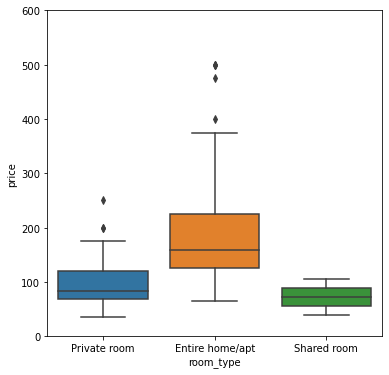

In [184]:
#  BOXPLOT
# The boxplot shows how the data is distributed and it also shows any outliers.
# We need to compare and Visualize price and room_type relationship
plt.subplots(figsize=(6, 6))
sns.boxplot(x = 'room_type', y = 'price', data = airbnb)
plt.ylim(0,600)
plt.show()

C:\Users\anto6\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Neighbourhood Group')

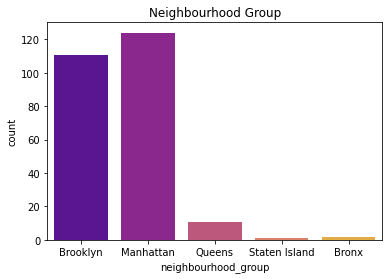

In [188]:
# Count plot
# Using count plot we wanted to visualize and count each neighbour hood group and we will understand Manhattan having hihest number of bookings.

sns.countplot(airbnb['neighbourhood_group'], palette="plasma")
plt.title('Neighbourhood Group')

In [18]:
# Check duplicate values:

duplicate = airbnb.duplicated(subset="id",keep=False)
print(duplicate)

0      False
1      False
2      False
3      False
4      False
       ...  
244    False
245    False
246    False
247    False
248    False
Length: 249, dtype: bool


In [61]:
airbnb

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,61492,Exclusive Room with Private Bath in LES,297769,Tunji,Manhattan,Chinatown,40.71445,-73.99080,Private room,120,4,171,2019-06-23,1.80,2,353
245,61509,"Quiet, clean midtown apt w. elevato",23619,Anna/Fonzy,Manhattan,Midtown,40.75749,-73.96897,Entire home/apt,110,200,92,2019-04-30,0.90,1,140
246,62095,BK Sweet Suite w/Kitchen&FullBath,281764,Colette&Sean,Brooklyn,East Flatbush,40.64446,-73.95030,Entire home/apt,65,3,238,2019-06-14,2.30,1,2
247,62427,Great East Village Apartment Rental,303882,Brie,Manhattan,East Village,40.72680,-73.99079,Entire home/apt,130,50,56,2019-05-26,0.58,1,56


In [60]:
airbnb[duplicate].sort_values('id')

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365


In [ ]:
#There is no duplicate values.

In [ ]:
# Deal with reviews per month column

In [63]:
airbnb["reviews_per_month"].isna().sum()

7

In [74]:
# We should drop this column

del airbnb["reviews_per_month"]

#### Deal with last review column also:

**As we can c missing values and there is no further use of last review column we need to drop that column.



In [82]:
airbnb["last_review"]

0     2018-10-19
1     2019-05-21
2            NaT
3     2019-07-05
4     2018-11-19
         ...    
244   2019-06-23
245   2019-04-30
246   2019-06-14
247   2019-05-26
248   2019-06-22
Name: last_review, Length: 249, dtype: datetime64[ns]

In [83]:
del airbnb["last_review"]

In [35]:
#We have to plot a graph and check which city/place having maximum booking

In [34]:
Booking_per_city=airbnb["neighbourhood_group"].value_counts()
Booking_per_city



Manhattan        124
Brooklyn         111
Queens            11
Bronx              2
Staten Island      1
Name: neighbourhood_group, dtype: int64

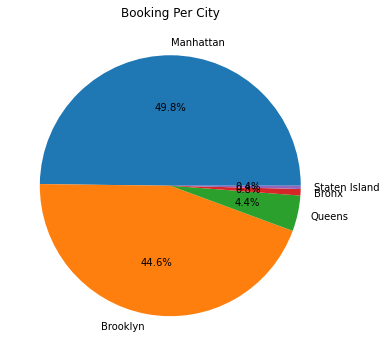

In [60]:
# By using the pie plot we are going to visualize the booking per city and percentage of booking.

fig, plot = plt.subplots(figsize=(6, 6))
labels = ['Manhattan', 'Brooklyn', 'Queens', 'Bronx','Staten Island']
plot.pie(Booking_per_city, labels=labels, autopct='%.1f%%')
plot.set_title('Booking Per City')
plt.show()

In [84]:
airbnb.isna().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

C:\Users\anto6\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


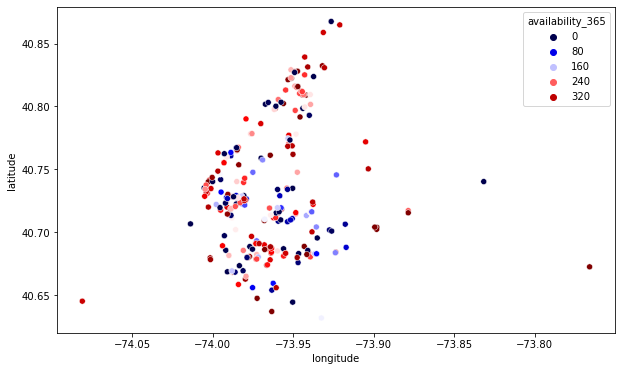

In [198]:
#Scatter Plot
# Using scatter plot we are ploting the availabilty 365 with latitude and longitude

plt.figure(figsize=(10,6))
sns.scatterplot(airbnb.longitude,airbnb.latitude,palette="seismic",hue=airbnb.availability_365)
plt.show()

In [ ]:
# airbnb  data is clean with no missing and duplicate values.


In [135]:
hrdata=pd.read_csv("HRDataset_v14.csv")

In [136]:
hrdata

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,"Woodson, Jason",10135,0,0,1,1,5,3,0,65893,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,4.07,4,0,2/28/2019,0,13
307,"Ybarra, Catherine",10301,0,0,0,5,5,1,0,48513,...,Brannon Miller,12.0,Google Search,PIP,3.20,2,0,9/2/2015,5,4
308,"Zamora, Jennifer",10010,0,0,0,1,3,4,0,220450,...,Janet King,2.0,Employee Referral,Exceeds,4.60,5,6,2/21/2019,0,16
309,"Zhou, Julia",10043,0,0,0,1,3,3,0,89292,...,Simon Roup,4.0,Employee Referral,Fully Meets,5.00,3,5,2/1/2019,0,11


In [87]:
hrdata.shape   # having 311 rows and 36 columns

(311, 36)

In [88]:
hrdata.describe()

,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Zip,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,303.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,10156.000000,0.398714,0.810289,0.434084,2.392283,4.610932,2.977492,0.093248,69020.684887,0.334405,16.845659,6555.482315,14.570957,4.110000,3.890675,1.218650,0.414791,10.237942
std,89.922189,0.490423,0.943239,0.496435,1.794383,1.083487,0.587072,0.291248,25156.636930,0.472542,6.223419,16908.396884,8.078306,0.789938,0.909241,2.349421,1.294519,5.852596
min,10001.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,45046.000000,0.000000,1.000000,1013.000000,1.000000,1.120000,1.000000,0.000000,0.000000,1.000000
25%,10078.500000,0.000000,0.000000,0.000000,1.000000,5.000000,3.000000,0.000000,55501.500000,0.000000,18.000000,1901.500000,10.000000,3.690000,3.000000,0.000000,0.000000,5.000000
50%,10156.000000,0.000000,1.000000,0.000000,1.000000,5.000000,3.000000,0.000000,62810.000000,0.000000,19.000000,2132.000000,15.000000,4.280000,4.000000,0.000000,0.000000,10.000000
75%,10233.500000,1.000000,1.000000,1.000000,5.000000,5.000000,3.000000,0.000000,72036.000000,1.000000,20.000000,2355.000000,19.000000,4.700000,5.000000,0.000000,0.000000,15.000000
max,10311.000000,1.000000,4.000000,1.000000,5.000000,6.000000,4.000000,1.000000,250000.000000,1.000000,30.000000,98052.000000,39.000000,5.000000,5.000000,8.000000,6.000000,20.000000


In [ ]:
# ManagerID having some missing values

In [90]:
hrdata.dtypes

Employee_Name                  object
EmpID                           int64
MarriedID                       int64
MaritalStatusID                 int64
GenderID                        int64
EmpStatusID                     int64
DeptID                          int64
PerfScoreID                     int64
FromDiversityJobFairID          int64
Salary                          int64
Termd                           int64
PositionID                      int64
Position                       object
State                          object
Zip                             int64
DOB                            object
Sex                            object
MaritalDesc                    object
CitizenDesc                    object
HispanicLatino                 object
RaceDesc                       object
DateofHire                     object
DateofTermination              object
TermReason                     object
EmploymentStatus               object
Department                     object
ManagerName 

In [91]:
# Check categerical columns details.
Category=hrdata.dtypes[hrdata.dtypes=="object"].index
Category

Index(['Employee_Name', 'Position', 'State', 'DOB', 'Sex', 'MaritalDesc',
       'CitizenDesc', 'HispanicLatino', 'RaceDesc', 'DateofHire',
       'DateofTermination', 'TermReason', 'EmploymentStatus', 'Department',
       'ManagerName', 'RecruitmentSource', 'PerformanceScore',
       'LastPerformanceReview_Date'],
      dtype='object')

In [95]:
hrdata[Category].describe()

,Employee_Name,Position,State,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,RecruitmentSource,PerformanceScore,LastPerformanceReview_Date
count,311,311,311,311,311,311,311,311,311,311,104,311,311,311,311,311,311,311
unique,311,32,28,307,2,5,3,4,6,101,96,18,3,6,21,9,4,137
top,"Adinolfi, Wilson K",Production Technician I,MA,09/09/65,F,Single,US Citizen,No,White,1/10/2011,8/19/2018,N/A-StillEmployed,Active,Production,Michael Albert,Indeed,Fully Meets,1/14/2019
freq,1,137,276,2,176,137,295,282,187,14,2,207,207,209,22,87,243,18


In [ ]:
# We can understand that DateofTermination have some missing values.

In [96]:
hrdata.head(10)

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2
5,"Anderson, Linda",10002,0,0,0,1,5,4,0,57568,...,Amy Dunn,11.0,LinkedIn,Exceeds,5.00,5,0,1/7/2019,0,15
6,"Andreola, Colby",10194,0,0,0,1,4,3,0,95660,...,Alex Sweetwater,10.0,LinkedIn,Fully Meets,3.04,3,4,1/2/2019,0,19
7,"Athwal, Sam",10062,0,4,1,1,5,3,0,59365,...,Ketsia Liebig,19.0,Employee Referral,Fully Meets,5.00,4,0,2/25/2019,0,19
8,"Bachiochi, Linda",10114,0,0,0,3,5,3,1,47837,...,Brannon Miller,12.0,Diversity Job Fair,Fully Meets,4.46,3,0,1/25/2019,0,4
9,"Bacong, Alejandro",10250,0,2,1,1,3,3,0,50178,...,Peter Monroe,7.0,Indeed,Fully Meets,5.00,5,6,2/18/2019,0,16


In [97]:
# Check duplicate values:

duplicate_values = hrdata.duplicated(subset="EmpID",keep=False)
print(duplicate_values)

0      False
1      False
2      False
3      False
4      False
       ...  
306    False
307    False
308    False
309    False
310    False
Length: 311, dtype: bool


In [101]:
hrdata[duplicate_values].sort_values('EmpID')

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences


In [ ]:
# There is no duplicate data.

In [102]:
hrdata.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [ ]:
# Findout most of the recruitement is happend through which source.

# Deal with RecruitmentSource column

In [103]:
hrdata["RecruitmentSource"].unique()

array(['LinkedIn', 'Indeed', 'Google Search', 'Employee Referral',
       'Diversity Job Fair', 'On-line Web application', 'CareerBuilder',
       'Website', 'Other'], dtype=object)

In [121]:
recruitement_src=hrdata["RecruitmentSource"].value_counts()
recruitement_src



Indeed                     87
LinkedIn                   76
Google Search              49
Employee Referral          31
Diversity Job Fair         29
CareerBuilder              23
Website                    13
Other                       2
On-line Web application     1
Name: RecruitmentSource, dtype: int64

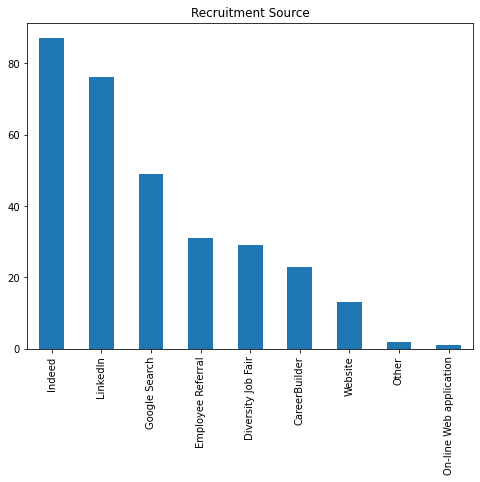

In [133]:
#Plot a Bar plot to visualize which source have max recruitement:

recruitement_src.plot(kind='bar',figsize=(8,6))
plt.title('Recruitment Source')
plt.xlabel="Source"
plt.ylabel="Count"


In [134]:
hrdata.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [138]:
hrdata["Department"].head()

0    Production       
1                IT/IS
2    Production       
3    Production       
4    Production       
Name: Department, dtype: object

In [139]:
hrdata["Department"].unique()

array(['Production       ', 'IT/IS', 'Software Engineering',
       'Admin Offices', 'Sales', 'Executive Office'], dtype=object)

In [141]:
# Here we can Production having extra spaces
# we remove that by using str.strip

hrdata["Department"]=hrdata["Department"].str.strip()
hrdata["Department"].unique()

array(['Production', 'IT/IS', 'Software Engineering', 'Admin Offices',
       'Sales', 'Executive Office'], dtype=object)

In [142]:
hrdata["Department"].value_counts()

Production              209
IT/IS                    50
Sales                    31
Software Engineering     11
Admin Offices             9
Executive Office          1
Name: Department, dtype: int64

In [143]:
# Deal with salary

hrdata["Salary"]

0       62506
1      104437
2       64955
3       64991
4       50825
        ...  
306     65893
307     48513
308    220450
309     89292
310     45046
Name: Salary, Length: 311, dtype: int64

In [160]:

hrdata["Salary"].max()

250000

In [156]:
# Check which dept ppl geeting high salary

salary_dept=hrdata.groupby('Department').agg({'Salary':'mean'})
salary_dept

,Salary
Department,
Admin Offices,71791.888889
Executive Office,250000.000000
IT/IS,97064.640000
Production,59953.545455
Sales,69061.258065
Software Engineering,94989.454545


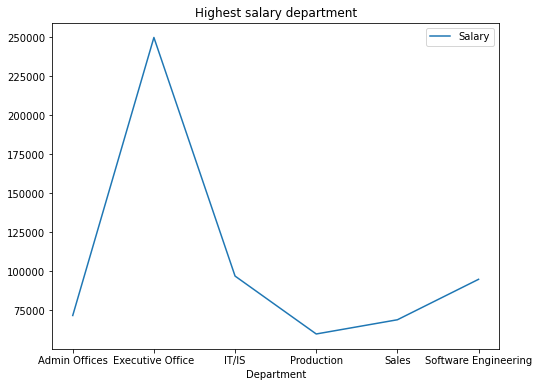

In [163]:
# excecutive office is geeting the highest salary

# we will plot a line grpah to visualize the higest salary towards each department.


salary_dept.plot(kind='line',figsize=(8,6))
plt.title("Highest salary department")
plt.xlabel="DEPARTMENT"
plt.ylabel="SALARY"

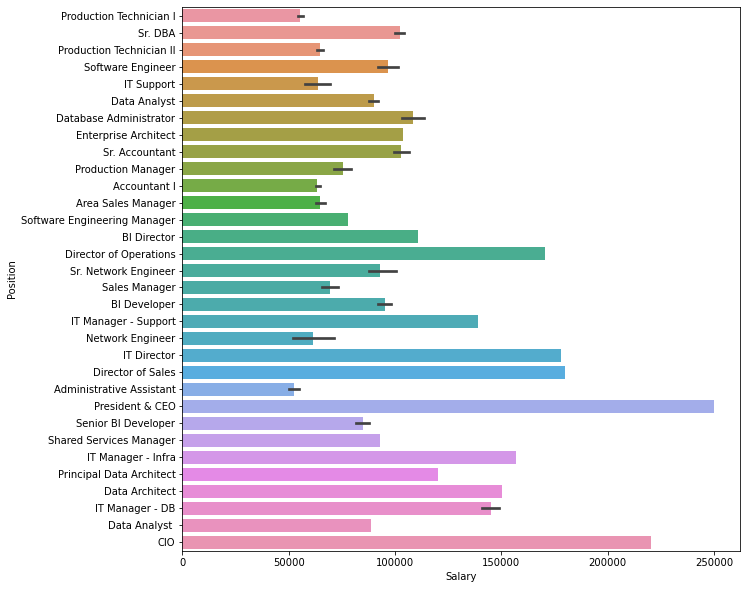

In [181]:
# Plot a Barplot to visualize the job role and the salary .
plt.subplots(figsize=(10, 10))
sns.barplot(x = 'Salary', y = 'Position', data = hrdata,orient='h')
plt.show()
# From this we can understand president CEO having the higest salary.

In [174]:
hrdata.dtypes

Employee_Name                  object
EmpID                           int64
MarriedID                       int64
MaritalStatusID                 int64
GenderID                        int64
EmpStatusID                     int64
DeptID                          int64
PerfScoreID                     int64
FromDiversityJobFairID          int64
Salary                          int64
Termd                           int64
PositionID                      int64
Position                       object
State                          object
Zip                             int64
DOB                            object
Sex                            object
MaritalDesc                    object
CitizenDesc                    object
HispanicLatino                 object
RaceDesc                       object
DateofHire                     object
DateofTermination              object
TermReason                     object
EmploymentStatus               object
Department                     object
ManagerName 

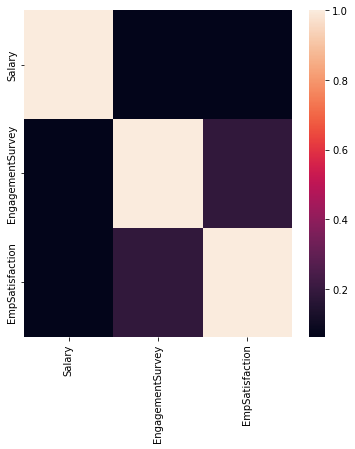

In [185]:
# plot a heatmapto findout  correlation between key variables from the dataset based on observations from above plot


plt.subplots(figsize=(6, 6))
hrdata_1 = hrdata[['Salary','EngagementSurvey','EmpSatisfaction']]
hcorr = hrdata_1.corr()
sns.heatmap(hcorr, 
        xticklabels=hcorr.columns,
        yticklabels=hcorr.columns)
plt.show()

In [199]:
# Check Active employees in the company

hrdata["EmploymentStatus"].value_counts()

Active                    207
Voluntarily Terminated     88
Terminated for Cause       16
Name: EmploymentStatus, dtype: int64

In [200]:
# Lets deal with employee satisfaction

hrdata["EmpSatisfaction"]

0      5
1      3
2      3
3      5
4      4
      ..
306    4
307    2
308    5
309    3
310    5
Name: EmpSatisfaction, Length: 311, dtype: int64

In [202]:
hrdata["EmpSatisfaction"].value_counts()

3    108
5     98
4     94
2      9
1      2
Name: EmpSatisfaction, dtype: int64

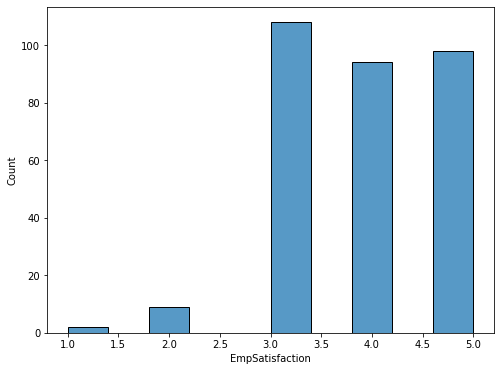

In [211]:
#Histogram Plot
#Plot a hisogram to analyze the quatitative data of employee satisfaction rating
plt.subplots(figsize=(8, 6))
sns.histplot(data=hrdata,x='EmpSatisfaction')
plt.title="Employee Satisfaction Rating"

# Max employess given rating as 3

In [212]:
# Hrdata check msiising values:

hrdata.isna().sum()

Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       8
RecruitmentSource               0
PerformanceSco

In [ ]:
# Date of termination having 207 missing values.
# Active employess are more .So only date of termination dates are less and missing that values.

In [213]:
hrdata["DateofTermination"]=hrdata["DateofTermination"].fillna(0)

# we are imputing 0 with missing places in date of termination column

In [214]:
hrdata.isna().sum()

Employee_Name                 0
EmpID                         0
MarriedID                     0
MaritalStatusID               0
GenderID                      0
EmpStatusID                   0
DeptID                        0
PerfScoreID                   0
FromDiversityJobFairID        0
Salary                        0
Termd                         0
PositionID                    0
Position                      0
State                         0
Zip                           0
DOB                           0
Sex                           0
MaritalDesc                   0
CitizenDesc                   0
HispanicLatino                0
RaceDesc                      0
DateofHire                    0
DateofTermination             0
TermReason                    0
EmploymentStatus              0
Department                    0
ManagerName                   0
ManagerID                     8
RecruitmentSource             0
PerformanceScore              0
EngagementSurvey              0
EmpSatis

In [ ]:
# There is no missing values and duplicates in HR data set.hence this data set is clean.